In [52]:
import time
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [18]:
type(X)

numpy.ndarray

In [21]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

# X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [23]:
# To ensure randomisation we’ll create a random permutation of the number 0 to 69,999 which allows us 
# later to select the first five or ten thousand for our calculations and visualisations.
rndperm = np.random.permutation(df.shape[0])

In [2]:
n_sne = 7000

In [28]:
# run PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#[out] Explained variation per principal component: [ 0.16756229  0.0826886   0.05374424]


Explained variation per principal component: [ 0.09746116  0.07155445  0.06149531]


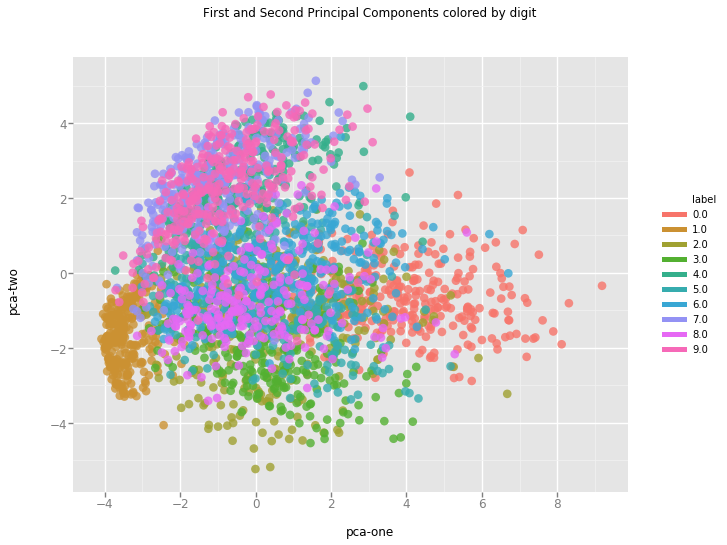

<ggplot: (-9223372029854854126)>

In [32]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [33]:
time_start = time.time()

In [34]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300) 

In [36]:
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], feat_cols].values)
print(('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.440s...
[t-SNE] Computed neighbors for 7000 samples in 71.316s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.235895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.948769
[t-SNE] Error after 300 iterations: 2.427809
t-SNE done! Time elapsed: 1966.5327351093292 seconds


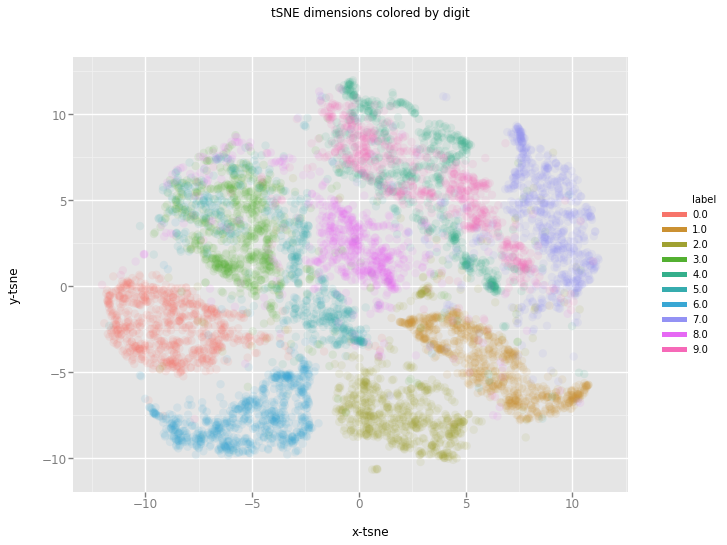

<ggplot: (7001233072)>

In [49]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70, alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [ ]:
# reduce dimensionality

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)
print 'Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_))
[out] Cumulative explained variation for 50 principal components: 84.6676222833%

In [44]:
from sklearn.decomposition import PCA

In [46]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

In [47]:
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))


Cumulative explained variation for 50 principal components: 0.8253906400247505


In [55]:
# load in new york pickle

new_york = pickle.load(open('new_york_matrix.pkle', mode='rb'))

In [ ]:
num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}


In [ ]:
pca_num_components = 2
tsne_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed

# calculate tf-idf of texts
tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
tf_idf_matrix = tf_idf_vectorizer.fit_transform(texts_list)

In [ ]:
# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)


In [ ]:
labels = clustering_model.fit_predict(tf_idf_matrix)
# print labels


X = tf_idf_matrix.todense()


In [ ]:
# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

In [ ]:
# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()